## Regresión ¿logística?

Para quienes poseen cierto conocimiento (o interés) respecto a todo lo que involucra la estadística, ciencia de datos y demás líneas de conocimiento afines habrán escuchado o sabrán de lo útil, práctico, sencillo e interpretable que resultan ser los modelos de regresión.

Como bien sabemos, los modelos de regresión lineales son usados para *modelar* la relación existente entre una (o más) variable(s) de respuesta **continua(s)** y una o más variables explicativas.

**Nota:** los modelos de regresión con una sola variable respuesta *continua* son conocidos como modelos de [regresión lineal múltiple](https://en.wikipedia.org/wiki/Linear_regression). Los modelos con más de una variable respuesta *continua* se denominan [módelos de regresión multivariados.](https://en.wikipedia.org/wiki/General_linear_model)

Sin embargo, aparece vagamente un comentario que no podemos obviar:

In [3]:
!cowsay -f ghostbusters "¿Alguien quiere pensar en las variables respuesta de tipo categóricas, por favor?"

 _________________________________________
/ ¿Alguien quiere pensar en las variables \
| respuesta de tipo categóricas, por      |
\ favor?                                  /
 -----------------------------------------
          \
           \
            \          __---__
                    _-       /--______
               __--( /     \ )XXXXXXXXXXX\v.
             .-XXX(   O   O  )XXXXXXXXXXXXXXX-
            /XXX(       U     )        XXXXXXX\
          /XXXXX(              )--_  XXXXXXXXXXX\
         /XXXXX/ (      O     )   XXXXXX   \XXXXX\
         XXXXX/   /            XXXXXX   \__ \XXXXX
         XXXXXX__/          XXXXXX         \__---->
 ---___  XXX__/          XXXXXX      \__         /
   \-  --__/   ___/\  XXXXXX            /  ___--/=
    \-\    ___/    XXXXXX              '--- XXXXXX
       \-\/XXX\ XXXXXX                      /XXXXX
         \XXXXXXXXX   \                    /XXXXX/
          \XXXXXX      >                 _/XXXXX/
            \XXXXX--__/              _

Para solventar esta problemática aparecen en escena los **modelos de regresión logística** como una de las posibles soluciones.

### Pongámonos un poco técnicos

La regresión logística se utiliza para predecir **la probabilidad** de una determinada clase o evento. Normalmente, el modelo es binomial, pero también puede extenderse a multinomial. Probablemente sea uno de los modelos más sencillos pero extremadamente útiles para muchas aplicaciones, por su rápida implementación y facilidad de interpretación.

Podemos pensar que la regresión logística es un [modelo lineal generalizado ](https://en.wikipedia.org/wiki/Generalized_linear_model)(GLM por sus siglas en inglés). De forma muy simplificada, un GLM es un modelo de la forma 

$$E\left[\underbrace{\mathbf{Y}}_{\color{green}{\text{Respuesta}}}\Big|\mathbf{x}\right] = \mu = \overbrace{g^{-1}}^{\color{red}{\text{f. link}}}\left(\underbrace{\mathbf{x}^t\boldsymbol{\beta}}_{\color{blue}{\text{predictor}}}\right)$$

Iniciemos con un modelo en el que el propósito sea predecir una variable de tipo cualitativa con dos categorías $A$ y $B$, usando algunas variables explicativas de las que tenemos información $\mathbf{x} = [\begin{array}{cccc}x_0 & x_1 & \cdots & x_p\end{array}]$. Si un individuo cae en la categoría $A$ le asignamos $1$, de lo contrario le asignamos $0$. Entonces, podemos asociar una variable $Y$ tal que $Y\sim \text{Ber}(p)$. Poniendo la información con la que disponemos, se tiene que 

$$E[\mathbf{Y}|x] = p = g^{-1}\left(\mathbf{x}^t\beta\right)$$

Donde:

- $Y\sim \text{Ber}(p)$
- $p$ es la probabilidad de que $Y = 1$, i.e. $P[Y=1] = p$

Ahora bien, la función $g^{-1}$ debe ser conocida. Suponiendo que esta existe, debe pasar que $g(p) = \mathbf{x}^t\beta$; sin embargo recordemos que $p \in (0, 1)$ entonces, la función $g$ debe construirse de tal forma que $g:(0,1)\rightarrow \mathbb{R}$, pues $\mathbf{x}^t\beta \in \mathbb{R}$.

#### Motivación de la función *logit*

Ahora bien, recordemos que la función de distribución de $Y$ puede escribirse como:

$$\begin{eqnarray*}
f_{Y}(y) & = & p^{y}(1-p)^{1-y}\\ 
    & = & \exp\big[y\ln(p) + (1-y)\ln(1-p)\big] \\
    & = & \exp\left[y\cdot \underbrace{\ln\left(\frac{p}{1-p}\right)}_{\color{green}{logit}} + \ln(1-p)\right]
\end{eqnarray*}
$$

Esta es la motivación de usar la función *logit*, pues la función de distribución de la variable $Y$ pertenece a la [familia exponencial.](https://en.wikipedia.org/wiki/Exponential_family)

Para precisar, vemos que la forma funcional de la función $logit$ viene dada por:

$$logit(p) = \ln\left(\frac{p}{1-p}\right)$$

De la ecuación anterior podemos deducir que 

$$\left\{
\begin{array}{cc}
p\to0, & logit(p)\to -\infty\\
p\to1, & logit(p)\to \infty
\end{array}\right.$$

Así que utilizaremos esta función *logit* para asignar los valores de probabilidad de $(0,1)$ a $(-\infty, \infty)$

Esto nos permite obtener la siguiente relación lineal:

$$logit(p) = \theta_0x_{0}^{(i)} + \theta_{1}x_{1}^{(i)} + \theta_{2}x_{2}^{(i)} + \cdots + \theta_{p}x_{p}^{(i)} = \mathbf{x}^t\boldsymbol{\beta}$$

Donde:

- El superíndice denota el $i$-ésimo ejemplo (o individuo, item, etc)
- El subíndice denota la característica o los predictores $x_1, x_2$, etc.
- Por lo general la variable $x_0$ siempre es 1, para plantear un modelo con intercepto

Adicional a esto, la cantidad $\frac{p}{1-p}$ tiene un nombre especial, [*odds*](https://en.wikipedia.org/wiki/Odds). De forma coloquial, podemos entender esta cantidad como una comparación entre la cantidad de *casos a favor* sobre la cantidad de *casos en contra*.

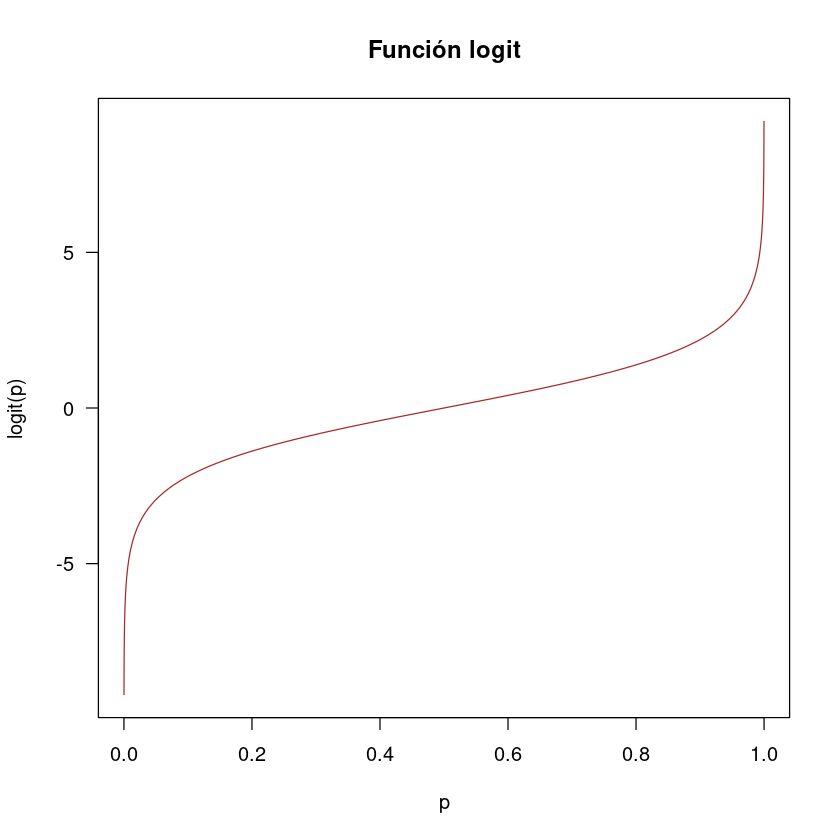

In [2]:
# Logit
logit <- function(p){
    log(p/(1-p))
}

# Gráfico
p <- seq(1/10000, 9999/10000, by = 0.0001)
plot(x = p, y = logit(p), type = "l", col = "brown", 
     las = 1, main = "Función logit")

Falta mencionar el último ingrediente para poder iniciar: **la verosimilitud**


## Volviendo un poco atras ...

La función de verosimilitud simplemente es la función de densidad conjunta (fdd) de un conjunto de variables aleatorias en función de los parámetros. Es decir que, una vez observados los datos proponemos un modelo probabilístico para la fdd y consideramos como variables a los parámetros. En lenguaje probabilístico:

$$\begin{eqnarray*}
L(\overbrace{\boldsymbol{\theta}}^{\color{green}{\text{Varía}}}|\underbrace{x_1, \ldots,x_k}_{\color{blue}{\text{Observados}}}) & = & f_{\mathbf{X}_1,\ldots,\mathbf{X}_k}\left(\boldsymbol{\theta}|x_1, \ldots,x_k\right) \\
    & \underbrace{=}_{\color{red}{\text{m.a.}}} & \prod_{i=1}^{k} f_{\mathbf{X}_1}(\boldsymbol{\theta}|x_i)
\end{eqnarray*}$$

Y la *log-verosimilitud* es tomar el logaritmo natural de esta función: $\mathcal{L}(\boldsymbol{\theta}) = \ln \big[L(\boldsymbol{\theta}|x_1,\ldots,x_k)\big]$

Pero ¿y para qué esta función?. La explicación es simple: intentamos buscar los **parámetros** que hagan más probables los datos observados, i.e. 

In [1]:
# Construcción de la Log-Verosimilitud
Log_veros <- function(datos, densidad, parAmetros = 1,...){
    if(parAmetros == 1){
        L <- function(theta){
            sum(log(densidad(datos, theta, ...)))
        }
# "Vectorizar" una función consiste en poder pasar un vector ...
# ... como agumento y evaluar "L" en cada elemento
        L <- Vectorize(L, "theta")
    }else{
        L <- function(theta1, theta2){
            prod(densidad(x = datos, theta1, theta2, ...))
        }
        L <- Vectorize(L, c("theta1", "theta2"))
        L1 <- function(Theta){
            sum(log(densidad(x = datos, Theta[1], Theta[2], ...)))
        }
        list("Graficar" = L, "Optimizar" = L1)
    }
}

Ejemplos muy rápidos del uso de la función: 
- Modelo con un solo parámtero

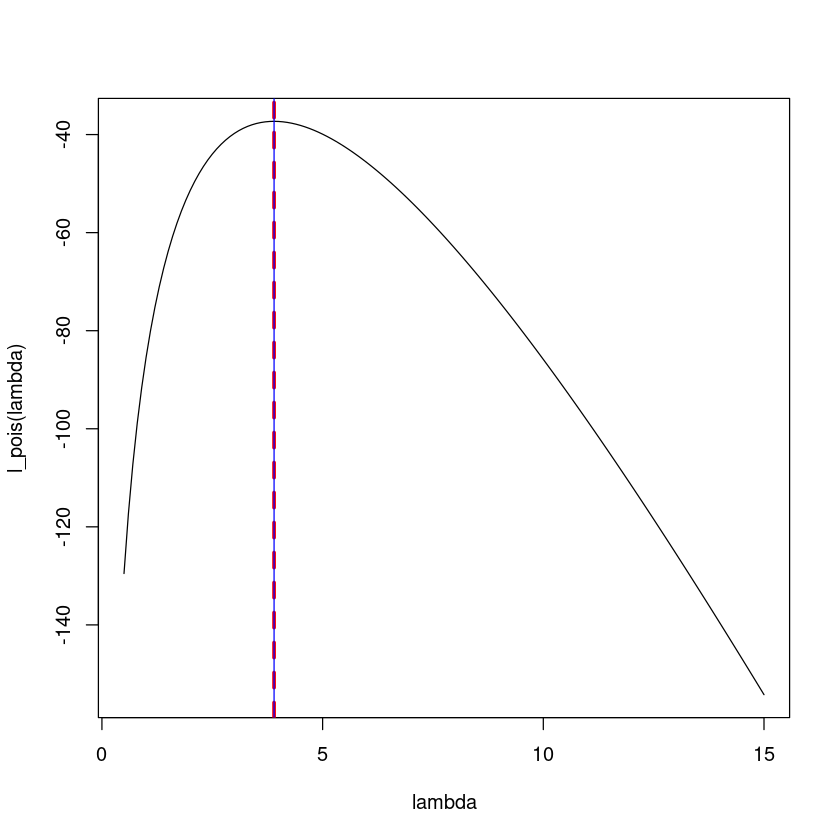

In [2]:
###~~~~~~~~~~~~~~~~~~~~ Ejemplo de función univariada:
set.seed(314)
y <- rpois(20, lambda = 5)

# Creamos la verosimilitud
l_pois <- Log_veros(y, dpois)

# Gráfico de la log_verosimilitud:
lambda <- seq(0.5, 15, by = 0.1)
plot(lambda, l_pois(lambda), type = "l")

# Agregamos la estimación máximo verosimil
x1 <- optimise(l_pois, c(0, 10), maximum = TRUE)      # Maximizando con R
abline(v = x1, col = "red", lty = 2, lwd = 3)

media <- mean(y)                                      # Haciendo las cuentas a mano
abline(v = media, col = "blue")                     

- Modelo con dos parámetros, pero uno es conocido (la varianza $\sigma^2$)

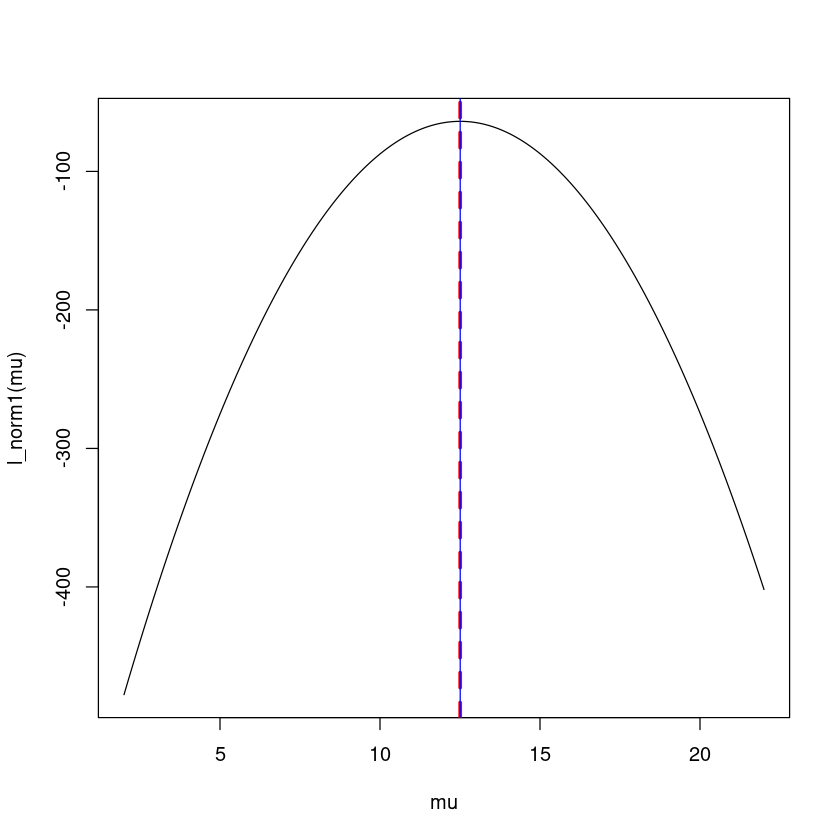

In [3]:
# Simulamos una muestra de una normal:
set.seed(3141)
x <- rnorm(30, 12, sd = 2)

# Log_verosimilitud de la muestra
l_norm1 <- Log_veros(datos = x, dnorm,parAmetros = 1, sd = 2)

# Visualización de la log_verosimilitd
mu <- seq(2, 22, by = 0.1)
plot(mu, l_norm1(mu), type = "l")

# Maximizar la mv
x1 <- optimise(l_norm1, c(2, 30), maximum = TRUE)      # Maximizando con R
abline(v = x1, col = "red", lty = 2, lwd = 3)

media <- mean(x)                                      # Haciendo las cuentas a mano
abline(v = media, col = "blue")                     

- Modelo con dos parámetros, ambos desconocidos

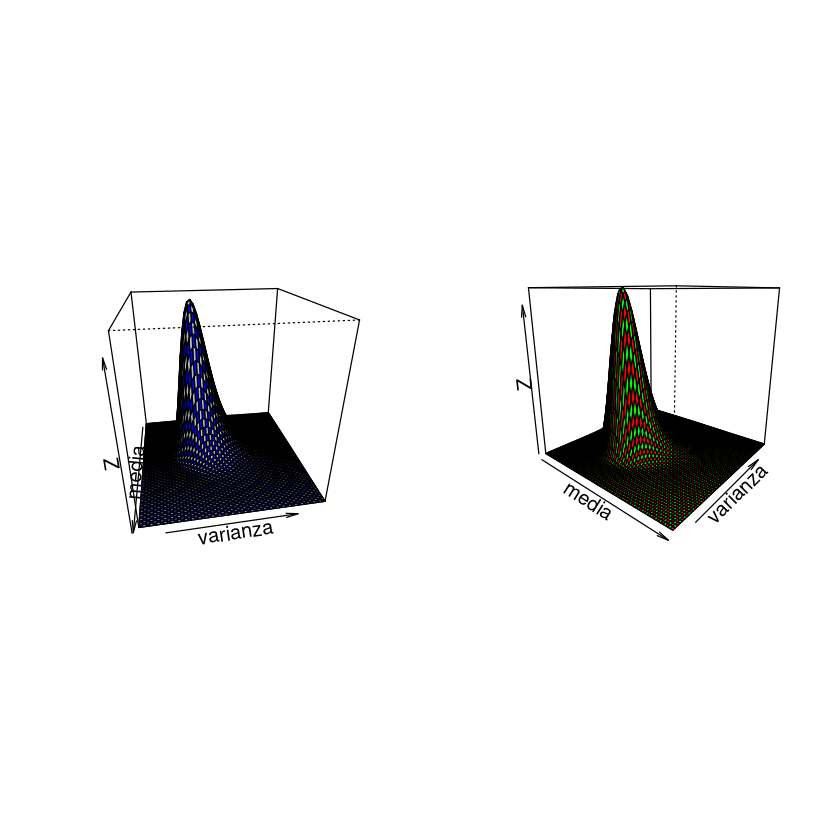

In [6]:
# Una normal
set.seed(314159)
y <- rnorm(10, mean = 7, sd = 4)

# Aplicamos la función
l_norm <- Log_veros(y, dnorm, parAmetros=2)

# Función a graficar
veros_norm <- l_norm$Graficar

# Función a optimizar (igual a la de arriba pero)
l_normO <- l_norm$Optimizar

# A graficar
media <- seq(0, 15, by = 0.2)
varianza <- seq(5/10, 12, by = 0.2)
Z <- outer(media, varianza, veros_norm)

# Verosimilitud
par(mfrow = c(1,2))
persp(media, varianza, Z, theta = 80, phi = 25, col = c("blue", "gray"))
persp(media, varianza, Z, theta = 40, phi = 15, col = c("red", "green"))

In [7]:
optim(c(5, 2), fn = l_normO, control = list(fnscale = -1))$par

[1] 5.496647 4.459747

In [8]:
# Contrastamos con los ejemplos teóricos
c("media" = mean(y), "var"=sqrt(var(y)*(length(y)-1)/length(y)) )

media      var 
5.495749 4.459710

### Fin del paréntesis ...

A continuación, la tarea consiste en encontrar $θ$, que representa mejor la variación de ***p*** al variar $X$ entre $m$ ejemplos de entrenamiento.

Para encontrar $θ$, necesitamos definir una función de coste. La función de coste es tal que cada predicción incorrecta (o más alejada del valor real) aumentará su valor. En la regresión logística, la función de coste se define como:

$$ J = - \frac{1}{m} \sum_{i=1}^{m} (y^{(i)}log(h(x^{(i)})) + (1 -  $$

## Proceso de regresión logística


Dado un dato(X,Y), siendo X una matriz de valores con m ejemplos y n características e Y un vector con m ejemplos. El objetivo es entrenar el modelo para predecir a qué clase pertenecen los valores futuros. En primer lugar, creamos una matriz de pesos con una inicialización aleatoria. Luego la multiplicamos por las características.

$$ a = w_0 + w_1x_1 + w_2x_2 + ...w_nx_n$$

A continuación, pasamos el resultado obtenido de la ecuación anterior a una función de enlace

$$ \sigma(z) = \frac{1}{1+e^{-z}} $$

Enlaces :
https://towardsdatascience.com/logistic-regression-from-scratch-in-r-b5b122fd8e83 --topê
https://medium.com/analytics-vidhya/logistic-regression-b35d2801a29c
https://medium.com/analytics-vidhya/the-math-behind-logistic-regression-c2f04ca27bca
https://towardsdatascience.com/logistic-regression-explained-from-scratch-visually-mathematically-and-programmatically-eb83520fdf9a